# Y: Categorical - Gini

In [1]:
# csv파일 불러오기
import pandas as pd
import numpy as np
diabetes_data_unrevised = pd.read_csv("diabetes.csv")

### 이상치 제거

In [2]:
diabetes_data_unrevised.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [3]:
diabetes_data = diabetes_data_unrevised.copy(deep = True)
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [4]:
print(diabetes_data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [5]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

In [6]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.108073  140.671875   
std       3.369578   30.435949      12.096346       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
diabetes_data # 0: Non-diabetes 1: Diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [9]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [10]:
diabetes_data['Outcome'].value_counts() # Y열의 데이터 개수 확인

0    500
1    268
Name: Outcome, dtype: int64

In [11]:
# Features와 target 나누기
d_features = diabetes_data[diabetes_data.columns[:-1]]
d_target = diabetes_data[diabetes_data.columns[-1]]

In [12]:
d_features

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [13]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    d_features, d_target, test_size = 0.2, random_state = 2021, stratify=d_target)

In [14]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

614
614
154
154


In [15]:
pd.DataFrame(train_target)['Outcome'].value_counts() # Y열의 데이터 개수 확인

0    400
1    214
Name: Outcome, dtype: int64

In [16]:
# Under Sampling: Y값을 각각 {0, 1} 214명씩
## sampling하기 전에 shuffling을 해주기(행 순서 섞기)
import sklearn
x_shuffled = sklearn.utils.shuffle(train_features, random_state=2021)
y_shuffled =sklearn.utils.shuffle(train_target, random_state=2021)

import imblearn
from imblearn.under_sampling import RandomUnderSampler
train_features_us, train_target_us = RandomUnderSampler(random_state=2021).fit_resample(x_shuffled, y_shuffled)

In [17]:
pd.DataFrame(train_target_us)['Outcome'].value_counts() # Y열의 데이터 개수 확인: total 428명

1    214
0    214
Name: Outcome, dtype: int64

# Decision Tree Modeling

In [18]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 2021, criterion = 'gini')
## DecisionTreeClassifier() 괄호 안에 넣을 수 있는 것들:
# criterion = 'gini' 또는 'entropy' (default='gini')
# max_depth = None (default)
# min_samples_leaf = 1 (default)
# min_samples_split = None (default)
# random_state = None (default)

tree_fit = tree.fit(train_features_us, train_target_us)

In [19]:
tree_fit

DecisionTreeClassifier(random_state=2021)

In [20]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [22]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image # CART Tree 그림
import pydotplus
import os

In [23]:
os.environ['PATH'] += os.pathsep + 'D:/Graphviz/bin'

In [24]:
import numpy as np
feature_names = train_features_us.columns.tolist()
target_name = np.array(['Non-diabetes', 'Diabetes'])

In [25]:
dot_data = export_graphviz(tree,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree_gini.png') #Tree 이미지를 저장

True

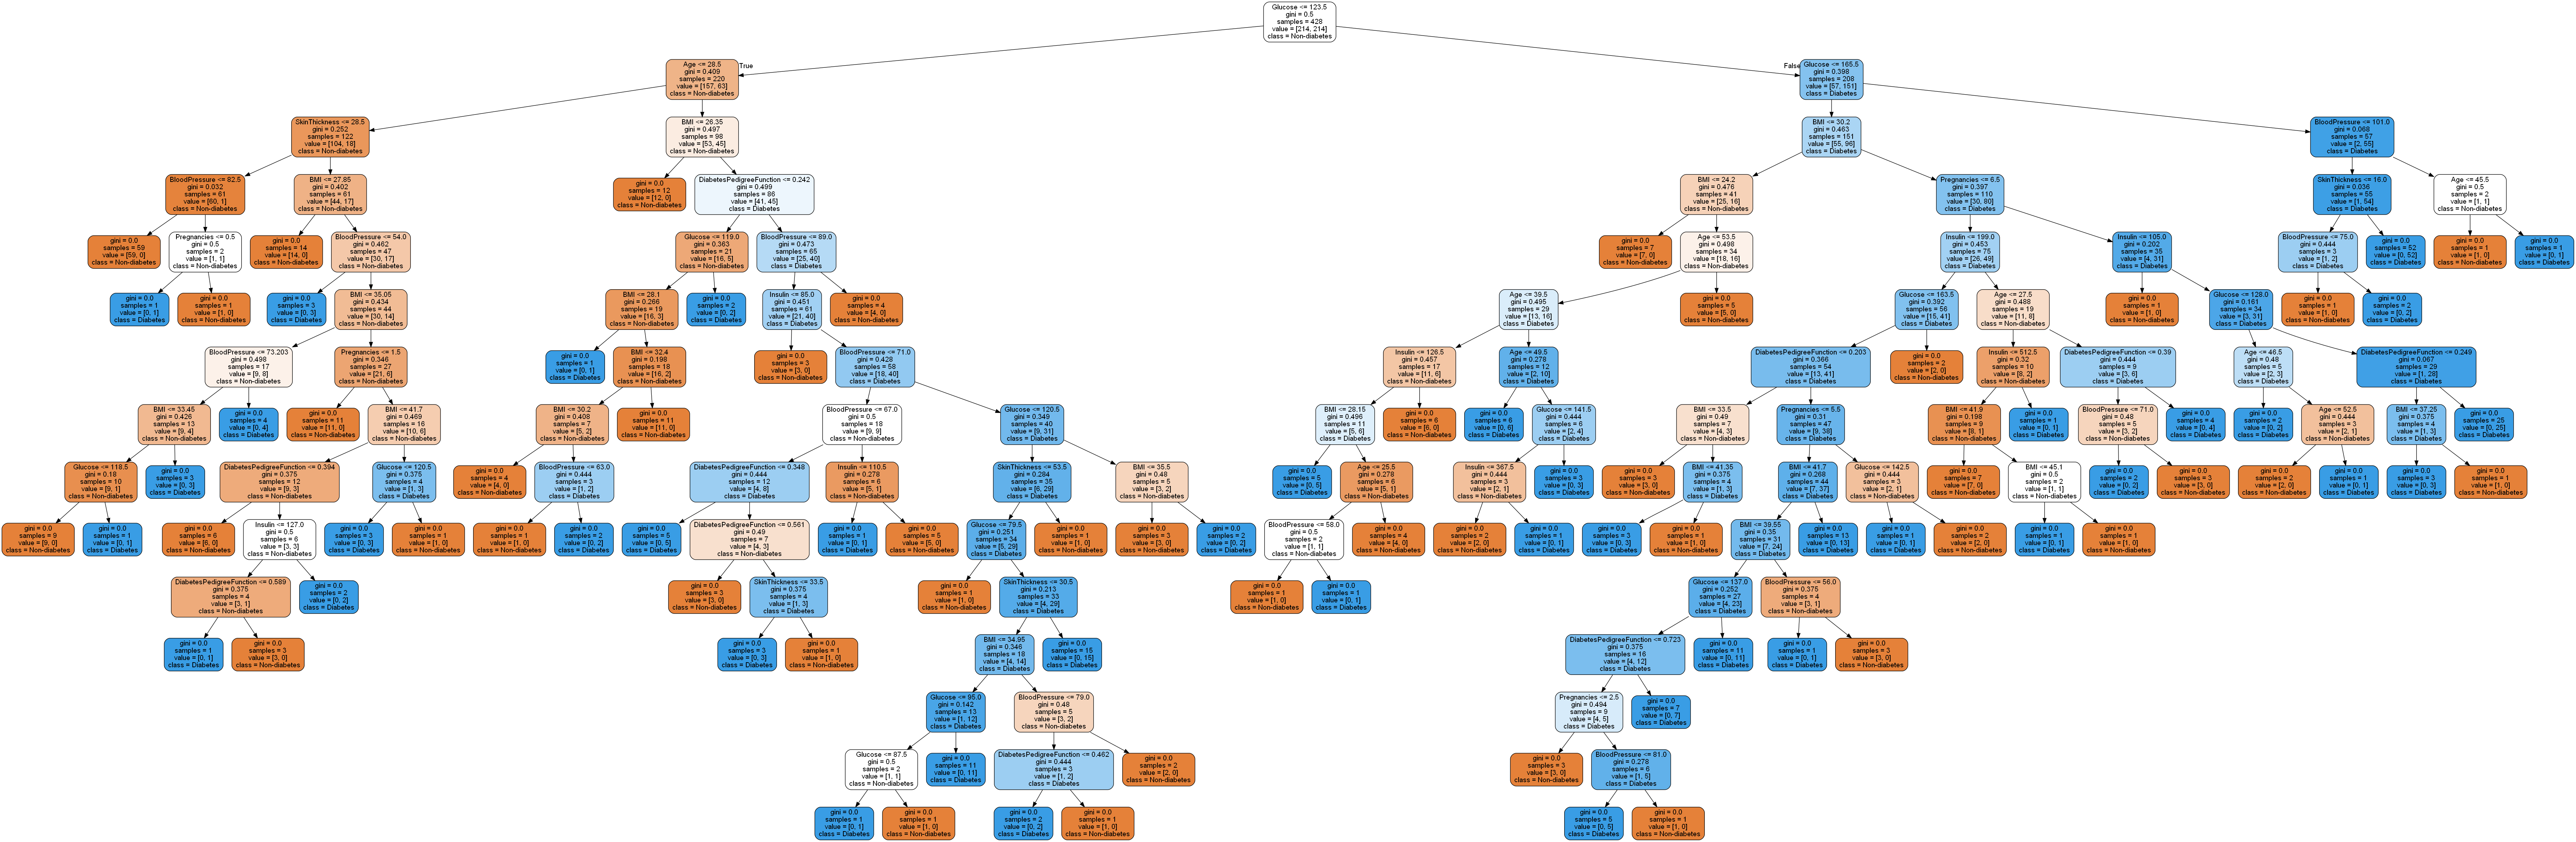

In [26]:
dt_graph = pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_png())

In [27]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator = tree,
                       X=train_features_us,
                       y=train_target_us,
                       scoring = ['f1'],
                       cv=10,
                       n_jobs= -1,
                       return_train_score=False)

print('CV f1: %s' % scores['test_f1'])
print('CV f1(Mean): %.3f (std: %.3f)' % (np.mean(scores['test_f1']),
                                     np.std(scores['test_f1'])))

## f1기준으로 교차검증하려고 training데이터를 가지고 일단 f1 score를 구했다.
## 밑에서부터 test데이터를 tree를 가지고 분류하여 score들을 구할거야.

CV f1: [0.59090909 0.61904762 0.66666667 0.63414634 0.76       0.72340426
 0.55       0.75555556 0.68085106 0.74418605]
CV f1(Mean): 0.672 (std: 0.070)


In [28]:
y_pred = tree.predict(test_features)

In [29]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [30]:
from sklearn.metrics import confusion_matrix

confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])

confmat

Predict[0]  Predict[1]
True[0]          71          29
True[1]          20          34

In [31]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       100
           1       0.54      0.63      0.58        54

    accuracy                           0.68       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.70      0.68      0.69       154



In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy: {0: .4f}'.format(accuracy_score(test_target, y_pred)))
print('Misclassification rate: {0: .4f}'.format((confmat.iloc[0,1]+confmat.iloc[1,0])/(confmat.iloc[0,0]+confmat.iloc[0,1]+confmat.iloc[1,0]+confmat.iloc[1,1])))
print('Sensitivity(recall): {0: .4f}'.format(recall_score(test_target, y_pred)))
print('Specificity: {0: .4f}'.format(confmat.iloc[0,0]/(confmat.iloc[0,0]+confmat.iloc[0,1])))
print('precision: {0: .4f}'.format(precision_score(test_target, y_pred)))
print('f1_score: {0: .4f}'.format(f1_score(test_target, y_pred)))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

Accuracy:  0.6818
Misclassification rate:  0.3182
Sensitivity(recall):  0.6296
Specificity:  0.7100
precision:  0.5397
f1_score:  0.5812
AUC: 0.670


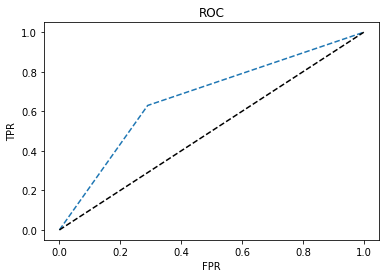

In [33]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

# 최적화

In [34]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=2021)) # default model로 시작
# pipeline은 hyper-parameter 값을 바꾸면서 여러 모델을 사용 가능.

In [35]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

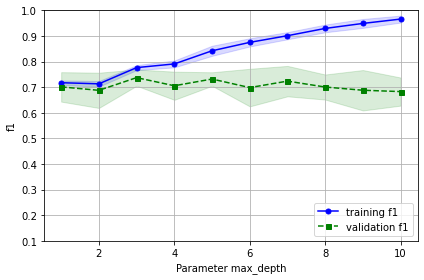

In [36]:
# 검정곡선: 과대적합 문제 확인
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features_us,
                                                   y = train_target_us,
                                                   param_name = 'decisiontreeclassifier__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   scoring="f1",
                                                   cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
validation_mean = np.mean(validation_scores, axis = 1)
validation_std = np.std(validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training f1')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation f1')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('f1')
plt.ylim([0.1, 1.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()

# train f1와 validation f1dl 모두 적절한 성능 & 편차가 적은 max_dept = 3 선택

# 하이퍼파라미터 튜닝 - Grid Search
##### 한번에 여러 parameter를 설정

In [37]:
from sklearn.model_selection import GridSearchCV

param_range1 = [1,2,3,4,5,6,7,8,9,10] # max depth 1~10
param_range2 = [10, 20, 30, 40, 50] # 한 leaf에 sample을 최소 sample을 몇명 이상으로 할건지
param_range3 = ['gini'] # gini방법 혹은 entropy방법

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}] # 3가지 parameter 조합

gs = GridSearchCV(estimator = pipe_tree, # classification을 위한 tree
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'f1',
                 cv=10,
                 n_jobs= -1) # 병렬 처리갯수? -1은 전부를 의미

gs = gs.fit(train_features_us, train_target_us)

print(gs.best_score_) # gini를 사용한경우 가장 f1이 좋았을때, max depth가 3이었을때, min samples leaf가 10이었을때
print(gs.best_params_)

0.7391368722785278
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__min_samples_leaf': 10}


In [38]:
# 최적의 모델 선택

best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성, 저장
best_tree.fit(train_features_us, train_target_us)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=10,
                                        random_state=2021))])

In [39]:
best_tree_for_graph = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_leaf=10, random_state = 2021)

In [40]:
best_tree_for_graph.fit(train_features_us, train_target_us)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=2021)

In [41]:
y_pred = best_tree.predict(test_features)

In [42]:
confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat
## 최종 모델로 분류한 결과

Predict[0]  Predict[1]
True[0]          63          37
True[1]           9          45

In [43]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.63      0.73       100
           1       0.55      0.83      0.66        54

    accuracy                           0.70       154
   macro avg       0.71      0.73      0.70       154
weighted avg       0.76      0.70      0.71       154



In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

gini_measure_list = []
gini_measure_list.append(accuracy_score(test_target, y_pred))
gini_measure_list.append((confmat.iloc[0,1]+confmat.iloc[1,0])/(confmat.iloc[0,0]+confmat.iloc[0,1]+confmat.iloc[1,0]+confmat.iloc[1,1]))
gini_measure_list.append(recall_score(test_target, y_pred))
gini_measure_list.append((confmat.iloc[0,0])/(confmat.iloc[0,0]+confmat.iloc[0,1]))
gini_measure_list.append(precision_score(test_target, y_pred))
gini_measure_list.append(f1_score(test_target, y_pred))
gini_measure_list.append(roc_auc_score(test_target, y_pred))

print('Accuracy: {0: .4f}'.format(accuracy_score(test_target, y_pred)))
print('Misclassification rate: {0: .4f}'.format((confmat.iloc[0,1]+confmat.iloc[1,0])/(confmat.iloc[0,0]+confmat.iloc[0,1]+confmat.iloc[1,0]+confmat.iloc[1,1])))
print('Sensitivity(recall): {0: .4f}'.format(recall_score(test_target, y_pred)))
print('Specificity: {0: .4f}'.format(confmat.iloc[0,0]/(confmat.iloc[0,0]+confmat.iloc[0,1])))
print('precision: {0: .4f}'.format(precision_score(test_target, y_pred)))
print('f1_score: {0: .4f}'.format(f1_score(test_target, y_pred)))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

Accuracy:  0.7013
Misclassification rate:  0.2987
Sensitivity(recall):  0.8333
Specificity:  0.6300
precision:  0.5488
f1_score:  0.6618
AUC: 0.732


In [45]:
gini_measure_list

[0.7012987012987013,
 0.2987012987012987,
 0.8333333333333334,
 0.63,
 0.5487804878048781,
 0.6617647058823529,
 0.7316666666666667]

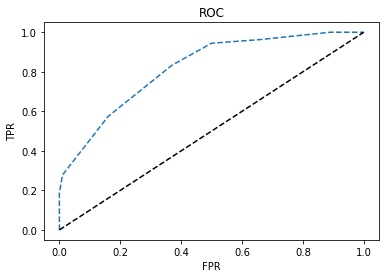

In [46]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, best_tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [47]:
import numpy as np
feature_names = train_features_us.columns.tolist()
target_name = np.array(['Non-diabetes', 'Diabetes'])

In [48]:
dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data_best)
graph.write_png('tree_best_gini.png') #Tree 이미지를 저장

True

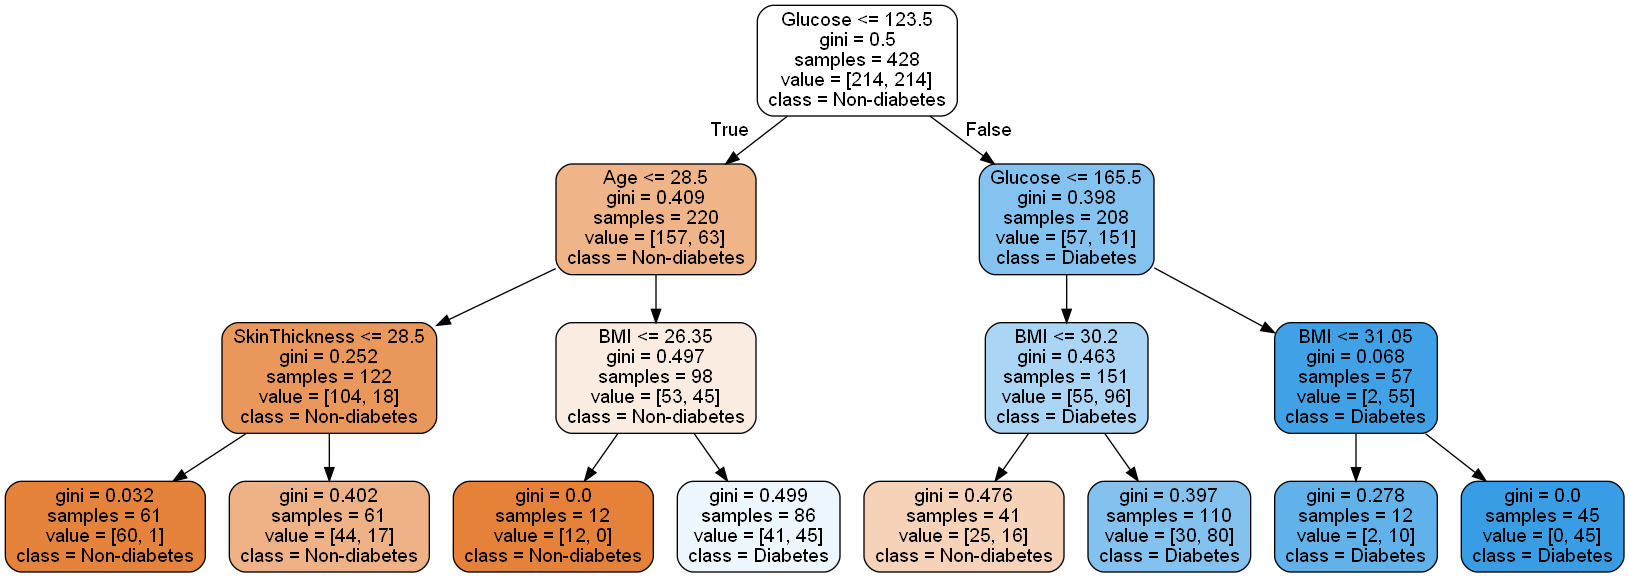

In [49]:
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)
Image(dt_graph_best.create_png())

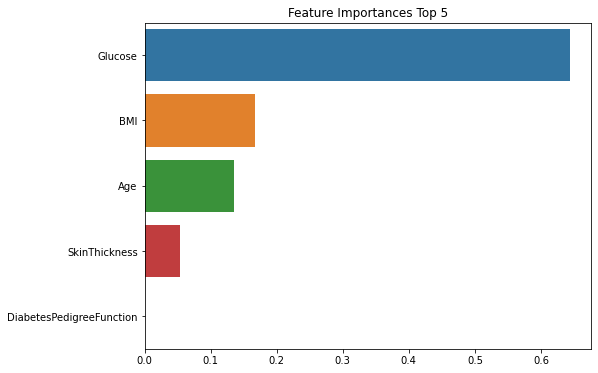

In [50]:
# Feature Importance

import seaborn as sns
feature_importance_values = best_tree_for_graph.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=train_features_us.columns)
# 중요도값 순으로 Series를 정렬
feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [51]:
feature_importances.sort_values(ascending=False)

Glucose                     0.643738
BMI                         0.167411
Age                         0.135129
SkinThickness               0.053722
DiabetesPedigreeFunction    0.000000
Insulin                     0.000000
BloodPressure               0.000000
Pregnancies                 0.000000
dtype: float64

# Y: Categorical  Entropy

In [52]:
# csv파일 불러오기
import pandas as pd
import numpy as np
diabetes_data = pd.read_csv("diabetes.csv")

### 이상치 제거

In [53]:
diabetes_data_unrevised.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [54]:
diabetes_data = diabetes_data_unrevised.copy(deep = True)
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [55]:
print(diabetes_data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [56]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

In [57]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.108073  140.671875   
std       3.369578   30.435949      12.096346       8.791221   86.383060   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.000000  125.000000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.455208                  0.471876   33.240885    0.348958  
std      6.875177                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [58]:
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [59]:
diabetes_data # 0: Non-diabetes 1: Diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [60]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [61]:
diabetes_data['Outcome'].value_counts() # Y열의 데이터 개수 확인

0    500
1    268
Name: Outcome, dtype: int64

In [62]:
# Features와 target 나누기
d_features = diabetes_data[diabetes_data.columns[:-1]]
d_target = diabetes_data[diabetes_data.columns[-1]]

In [63]:
d_features

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    125.0  33.6   
1              1     85.0           66.0           29.0    125.0  26.6   
2              8    183.0           64.0           29.0    125.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    125.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           29.0    125.0  30.1   
767            1     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
4                       2.288   33  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[768 rows x 8 columns]

In [64]:
# train: test = 8:2 분리
from sklearn.model_selection import train_test_split
train_features, test_features , train_target, test_target = train_test_split(
    d_features, d_target, test_size = 0.2, random_state = 2021, stratify=d_target)

In [65]:
print(len(train_features))
print(len(train_target))

print(len(test_features))
print(len(test_target))

614
614
154
154


In [66]:
pd.DataFrame(train_target)['Outcome'].value_counts() # Y열의 데이터 개수 확인

0    400
1    214
Name: Outcome, dtype: int64

In [67]:
# Under Sampling: Y값을 각각 {0, 1} 214명씩
## sampling하기 전에 shuffling을 해주기(행 순서 섞기)
import sklearn
x_shuffled = sklearn.utils.shuffle(train_features, random_state=2021)
y_shuffled =sklearn.utils.shuffle(train_target, random_state=2021)

import imblearn
from imblearn.under_sampling import RandomUnderSampler
train_features_us, train_target_us = RandomUnderSampler(random_state=2021).fit_resample(x_shuffled, y_shuffled)

In [68]:
pd.DataFrame(train_target_us)['Outcome'].value_counts() # Y열의 데이터 개수 확인: total 428명

1    214
0    214
Name: Outcome, dtype: int64

# Decision Tree Modeling

In [69]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 2021, criterion = 'entropy')
## DecisionTreeClassifier() 괄호 안에 넣을 수 있는 것들:
# criterion = 'gini' 또는 'entropy' (default='gini')
# max_depth = None (default)
# min_samples_leaf = 1 (default)
# min_samples_split = None (default)
# random_state = None (default)

tree_fit = tree.fit(train_features_us, train_target_us)

In [70]:
tree_fit

DecisionTreeClassifier(criterion='entropy', random_state=2021)

In [71]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [72]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [73]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image # CART Tree 그림
import pydotplus
import os

In [74]:
os.environ['PATH'] += os.pathsep + 'D:/Graphviz/bin'

In [75]:
import numpy as np
feature_names = train_features_us.columns.tolist()
target_name = np.array(['Non-diabetes', 'Diabetes'])

In [76]:
dot_data = export_graphviz(tree,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree_entropy.png') #Tree 이미지를 저장

True

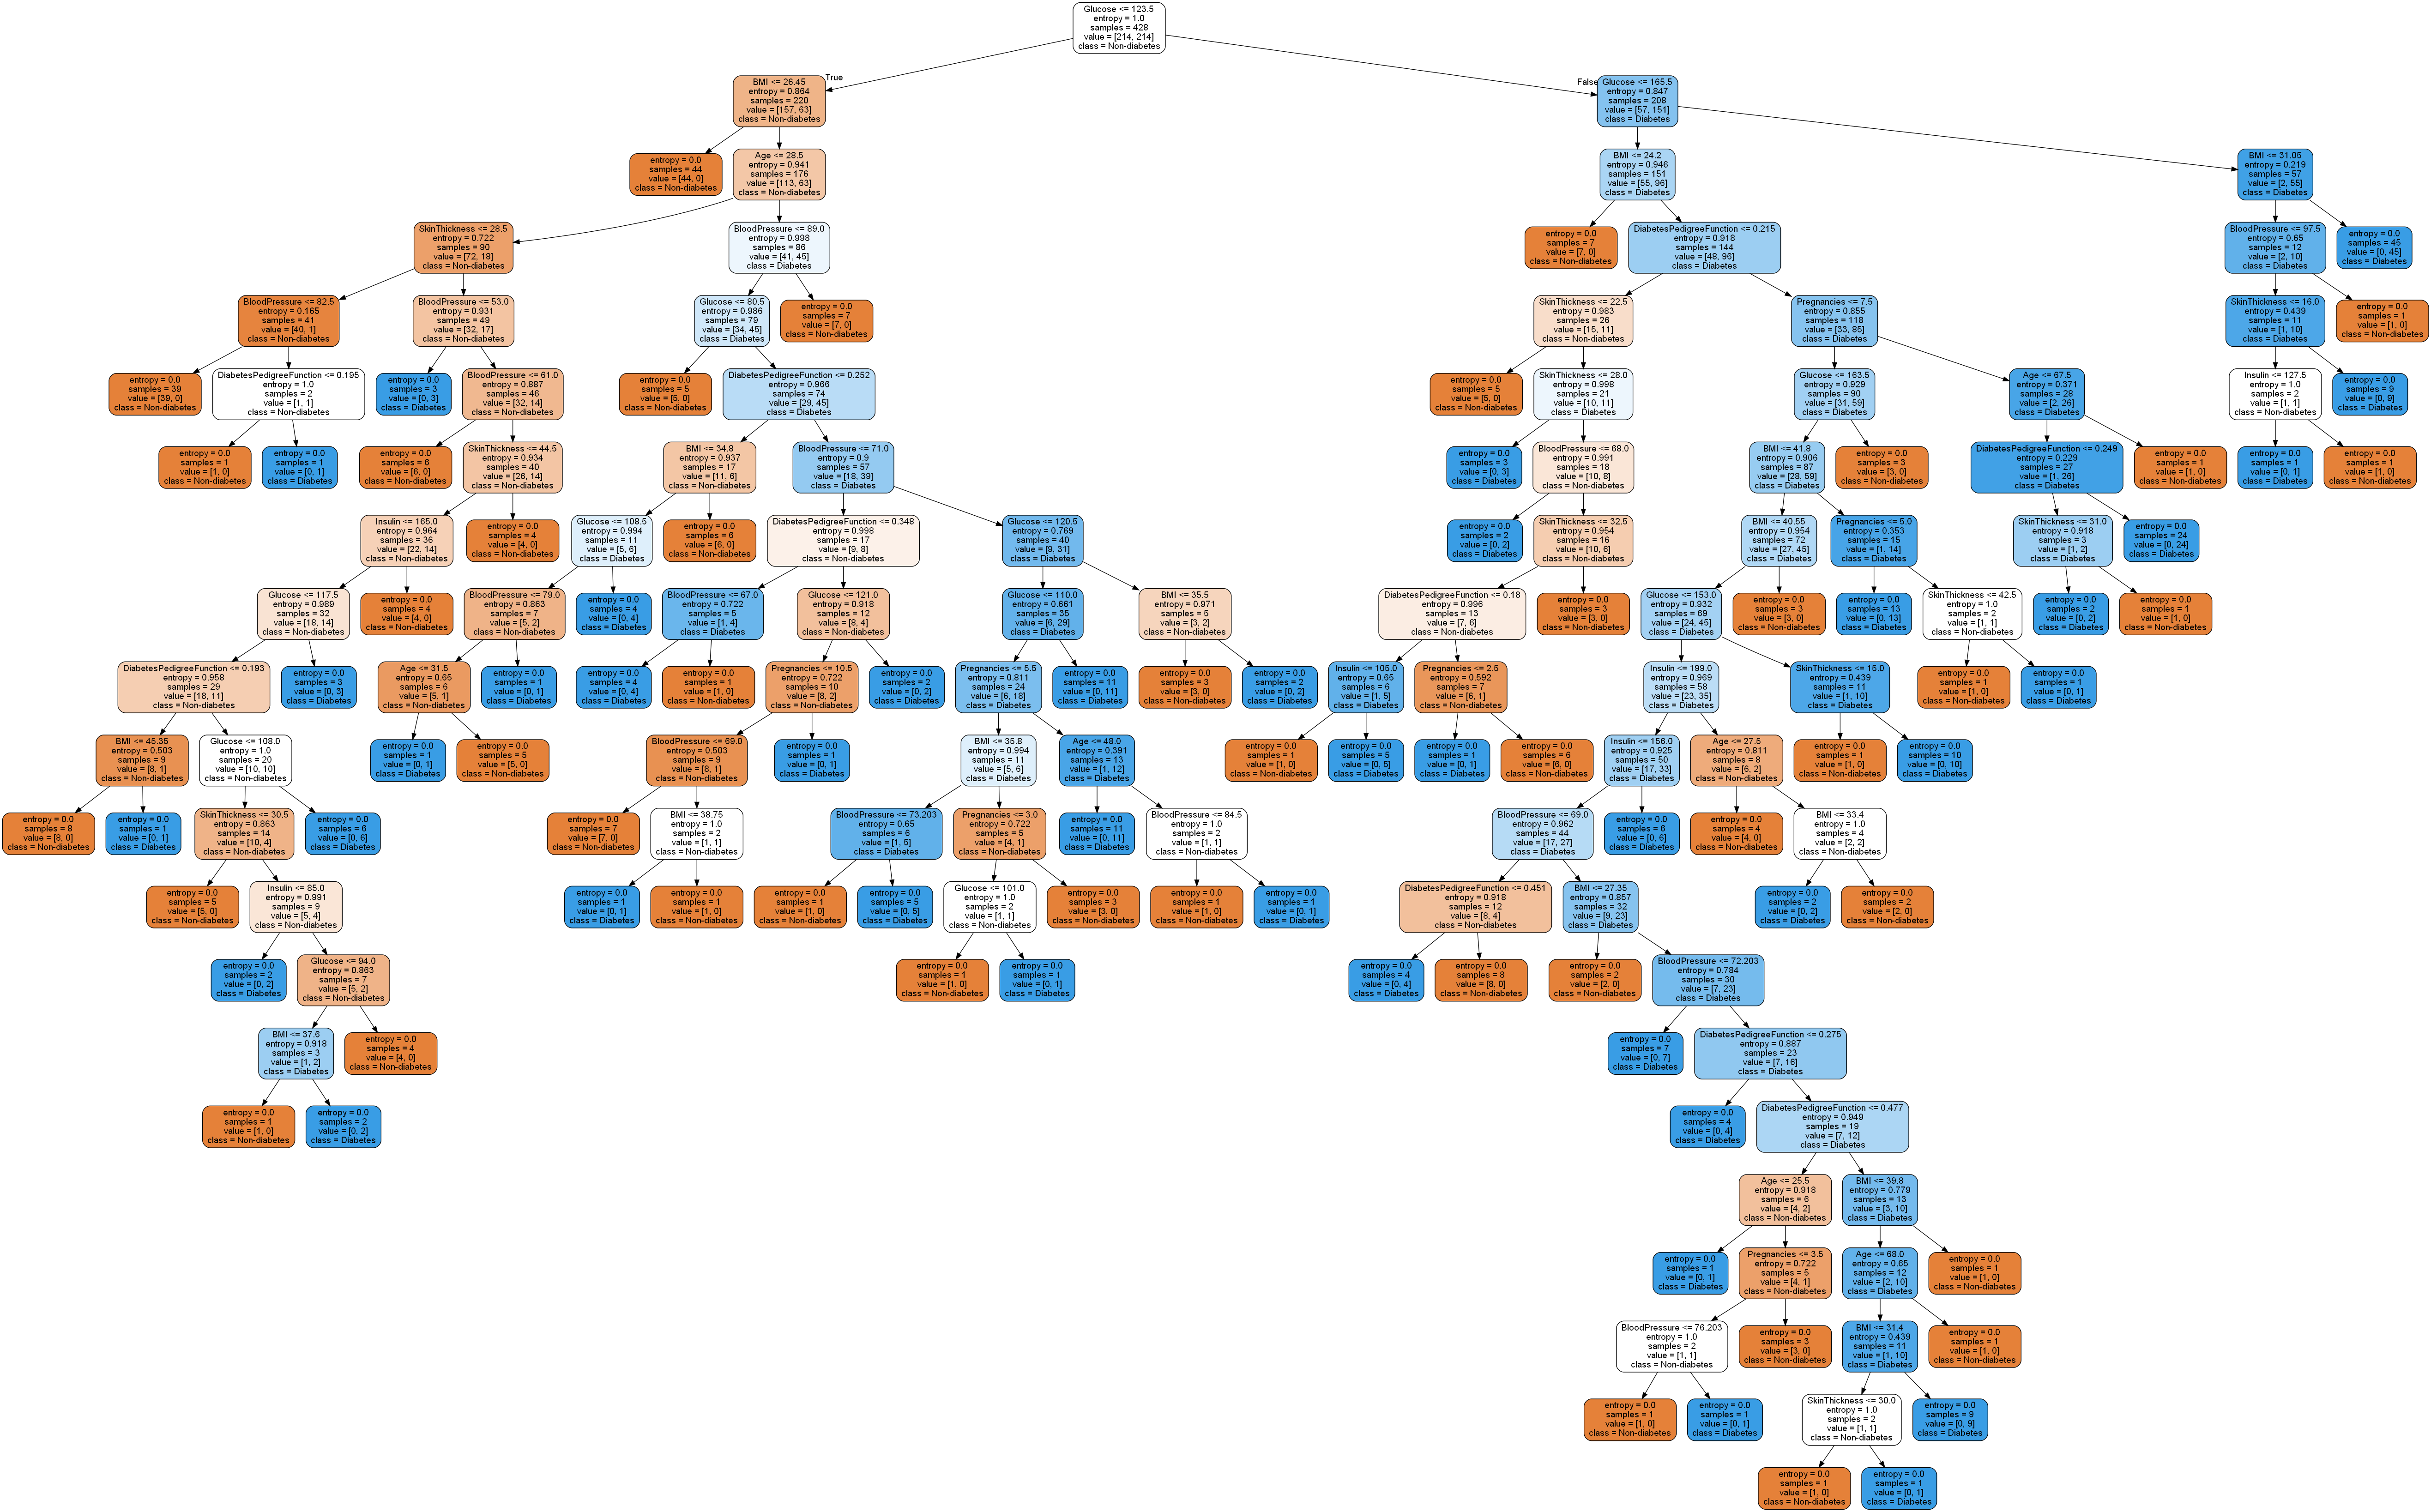

In [77]:
dt_graph = pydotplus.graph_from_dot_data(dot_data)
Image(dt_graph.create_png())

In [78]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator = tree,
                       X=train_features_us,
                       y=train_target_us,
                       scoring = ['f1'],
                       cv=10,
                       n_jobs= -1,
                       return_train_score=False)

print('CV f1: %s' % scores['test_f1'])
print('CV f1(Mean): %.3f (std: %.3f)' % (np.mean(scores['test_f1']),
                                     np.std(scores['test_f1'])))

## f1기준으로 교차검증하려고 training데이터를 가지고 일단 f1 score를 구했다.
## 밑에서부터 test데이터를 tree를 가지고 분류하여 score들을 구할거야.

CV f1: [0.64       0.52941176 0.60465116 0.51428571 0.51162791 0.71111111
 0.55555556 0.72340426 0.72       0.7027027 ]
CV f1(Mean): 0.621 (std: 0.085)


In [79]:
y_pred = tree.predict(test_features)

In [80]:
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0],
      dtype=int64)

In [81]:
from sklearn.metrics import confusion_matrix

confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])

confmat

Predict[0]  Predict[1]
True[0]          64          36
True[1]          15          39

In [82]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.64      0.72       100
           1       0.52      0.72      0.60        54

    accuracy                           0.67       154
   macro avg       0.67      0.68      0.66       154
weighted avg       0.71      0.67      0.68       154



In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy: {0: .4f}'.format(accuracy_score(test_target, y_pred)))
print('Misclassification rate: {0: .4f}'.format((confmat.iloc[0,1]+confmat.iloc[1,0])/(confmat.iloc[0,0]+confmat.iloc[0,1]+confmat.iloc[1,0]+confmat.iloc[1,1])))
print('Sensitivity(recall): {0: .4f}'.format(recall_score(test_target, y_pred)))
print('Specificity: {0: .4f}'.format(confmat.iloc[0,0]/(confmat.iloc[0,0]+confmat.iloc[0,1])))
print('precision: {0: .4f}'.format(precision_score(test_target, y_pred)))
print('f1_score: {0: .4f}'.format(f1_score(test_target, y_pred)))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

Accuracy:  0.6688
Misclassification rate:  0.3312
Sensitivity(recall):  0.7222
Specificity:  0.6400
precision:  0.5200
f1_score:  0.6047
AUC: 0.681


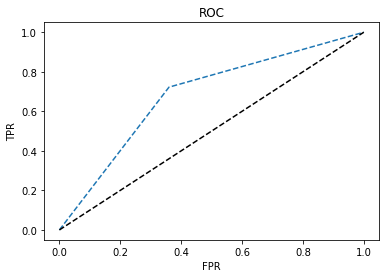

In [84]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

# 최적화

In [85]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeClassifier(random_state=2021)) # default model로 시작
# pipeline은 hyper-parameter 값을 바꾸면서 여러 모델을 사용 가능.

In [86]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

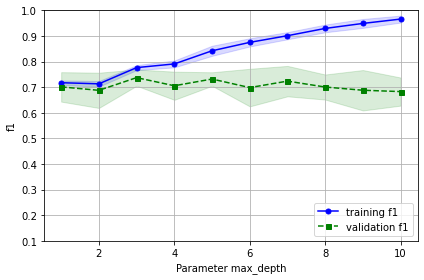

In [87]:
# 검정곡선: 과대적합 문제 확인
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_features_us,
                                                   y = train_target_us,
                                                   param_name = 'decisiontreeclassifier__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   scoring="f1",
                                                   cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
validation_mean = np.mean(validation_scores, axis = 1)
validation_std = np.std(validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training f1')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation f1')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('f1')
plt.ylim([0.1, 1.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()

# train accuracy와 validation accuracy가 모두 적절한 성능 & 편차가 적은 max_dept = 4 선택

# 하이퍼파라미터 튜닝 - Grid Search
##### 한번에 여러 parameter를 설정

In [88]:
from sklearn.model_selection import GridSearchCV

param_range1 = [1,2,3,4,5,6,7,8,9,10] # max depth 1~10
param_range2 = [10, 20, 30, 40, 50] # 한 leaf에 sample을 최소 sample을 몇명 이상으로 할건지
param_range3 = ['entropy'] # gini방법 혹은 entropy방법

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}] # 3가지 parameter 조합

gs = GridSearchCV(estimator = pipe_tree, # classification을 위한 tree
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'f1', 
                 cv=10,
                 n_jobs= -1) # 병렬 처리갯수? -1은 전부를 의미

gs = gs.fit(train_features_us, train_target_us)

print(gs.best_score_) # entropy를 사용한경우 가장 f1이 좋았을때, max depth가 4이었을때, min samples leaf가 50이었을때
print(gs.best_params_)

0.7473119207413134
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__min_samples_leaf': 50}


In [89]:
# 최적의 모델 선택

best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성, 저장
best_tree.fit(train_features_us, train_target_us)

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                        min_samples_leaf=50,
                                        random_state=2021))])

In [90]:
best_tree_for_graph = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=50, random_state = 2021)

In [91]:
best_tree_for_graph.fit(train_features_us, train_target_us)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=50,
                       random_state=2021)

In [92]:
y_pred = best_tree.predict(test_features)

In [93]:
confmat = pd.DataFrame(confusion_matrix(test_target, y_pred),
                      index=['True[0]', 'True[1]'],
                      columns=['Predict[0]', 'Predict[1]'])
confmat
## 최종 모델로 분류한 결과

Predict[0]  Predict[1]
True[0]          65          35
True[1]          13          41

In [94]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(test_target, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.65      0.73       100
           1       0.54      0.76      0.63        54

    accuracy                           0.69       154
   macro avg       0.69      0.70      0.68       154
weighted avg       0.73      0.69      0.70       154



In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

entropy_measure_list = []
entropy_measure_list.append(accuracy_score(test_target, y_pred))
entropy_measure_list.append((confmat.iloc[0,1]+confmat.iloc[1,0])/(confmat.iloc[0,0]+confmat.iloc[0,1]+confmat.iloc[1,0]+confmat.iloc[1,1]))
entropy_measure_list.append(recall_score(test_target, y_pred))
entropy_measure_list.append((confmat.iloc[0,0])/(confmat.iloc[0,0]+confmat.iloc[0,1]))
entropy_measure_list.append(precision_score(test_target, y_pred))
entropy_measure_list.append(f1_score(test_target, y_pred))
entropy_measure_list.append(roc_auc_score(test_target, y_pred))

print('Accuracy: {0: .4f}'.format(accuracy_score(test_target, y_pred)))
print('Misclassification rate: {0: .4f}'.format((confmat.iloc[0,1]+confmat.iloc[1,0])/(confmat.iloc[0,0]+confmat.iloc[0,1]+confmat.iloc[1,0]+confmat.iloc[1,1])))
print('Sensitivity(recall): {0: .4f}'.format(recall_score(test_target, y_pred)))
print('Specificity: {0: .4f}'.format(confmat.iloc[0,0]/(confmat.iloc[0,0]+confmat.iloc[0,1])))
print('precision: {0: .4f}'.format(precision_score(test_target, y_pred)))
print('f1_score: {0: .4f}'.format(f1_score(test_target, y_pred)))
print('AUC: %.3f' % roc_auc_score(test_target, y_pred))

Accuracy:  0.6883
Misclassification rate:  0.3117
Sensitivity(recall):  0.7593
Specificity:  0.6500
precision:  0.5395
f1_score:  0.6308
AUC: 0.705


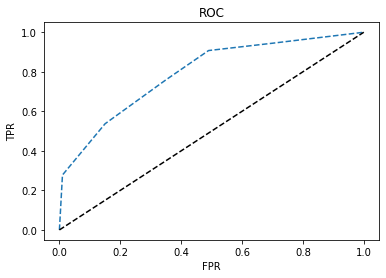

In [96]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve( test_target, best_tree.predict_proba(test_features)[:, 1] )

plt.plot(fpr, tpr, '--', label = 'Decision Tree')
plt.plot([0,1], [0,1], 'k--', label='random guess')
plt.plot([fpr],[tpr],'r-', ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

In [97]:
import numpy as np
feature_names = train_features_us.columns.tolist()
target_name = np.array(['Non-diabetes', 'Diabetes'])

In [98]:
dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data_best)
graph.write_png('tree_best_entropy.png') #Tree 이미지를 저장

True

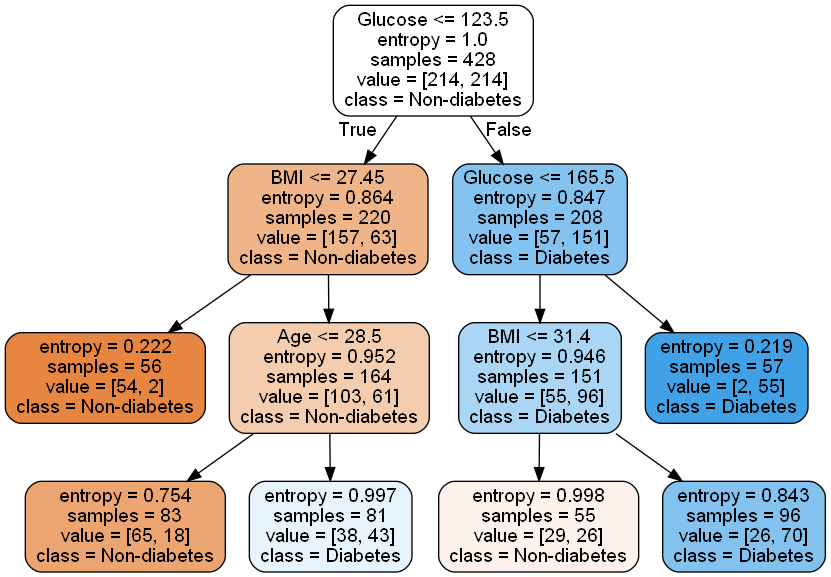

In [99]:
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)
Image(dt_graph_best.create_png())

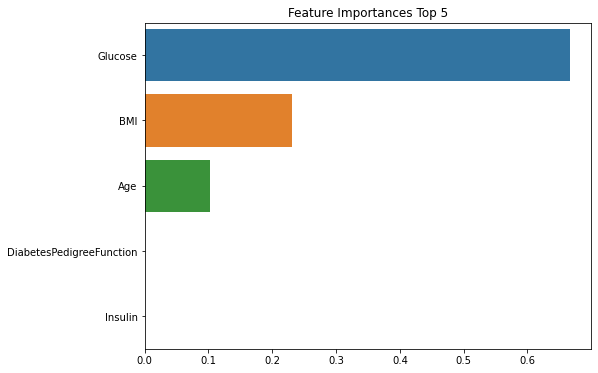

In [100]:
# Feature Importance

import seaborn as sns
feature_importance_values = best_tree_for_graph.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=train_features_us.columns)
# 중요도값 순으로 Series를 정렬
feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [101]:
feature_importances.sort_values(ascending=False)

Glucose                     0.666416
BMI                         0.230574
Age                         0.103010
DiabetesPedigreeFunction    0.000000
Insulin                     0.000000
SkinThickness               0.000000
BloodPressure               0.000000
Pregnancies                 0.000000
dtype: float64

# 비교

In [102]:
gini_measure_list

[0.7012987012987013,
 0.2987012987012987,
 0.8333333333333334,
 0.63,
 0.5487804878048781,
 0.6617647058823529,
 0.7316666666666667]

In [103]:
entropy_measure_list

[0.6883116883116883,
 0.3116883116883117,
 0.7592592592592593,
 0.65,
 0.5394736842105263,
 0.6307692307692309,
 0.7046296296296297]

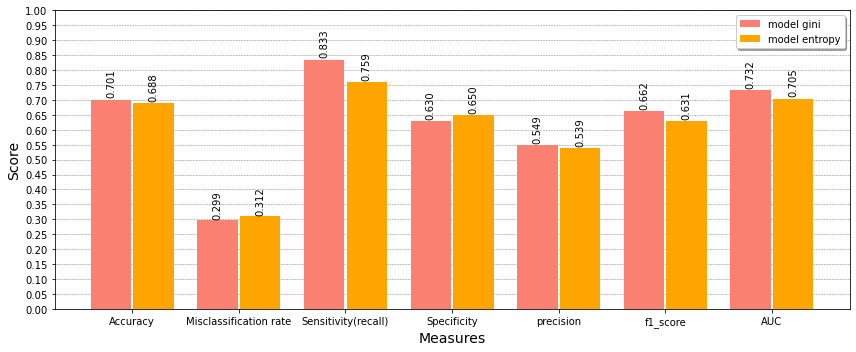

In [104]:
import matplotlib.pyplot as plt
import numpy as np

def main():
    #### 1. bar plot으로 나타낼 데이터 입력
    models = ['model gini', 'model entropy']
    xticks = ['Accuracy', 'Misclassification rate', 'Sensitivity(recall)', 'Specificity', 'precision', 'f1_score', 'AUC']
    data = {'model gini':[0.7012987012987013,0.2987012987012987,0.8333333333333334,0.63,0.5487804878048781,0.6617647058823529,0.7316666666666667],
            'model entropy':[0.6883116883116883,0.3116883116883117,0.7592592592592593,0.65,0.5394736842105263,0.6307692307692309,0.7046296296296297]}
    
    #### 2. matplotlib의 figure 및 axis 설정
    fig, ax = plt.subplots(1,1,figsize=(12,5)) # 1x1 figure matrix 생성, 가로(7인치)x세로(5인치) 크기지정
    colors = ['salmon', 'orange']
    width = 0.4
    
    #### 3. bar 그리기
    for i, model in enumerate(models):
        pos = compute_pos(xticks, width, i, models)
        bar = ax.bar(pos, data[model], width=width*0.95, label=model, color=colors[i])
        present_height(ax, bar) # bar높이 출력
    
    #### 4. x축 세부설정
    ax.set_xticks(range(len(xticks)))
    ax.set_xticklabels(xticks, fontsize=10)	
    ax.set_xlabel('Measures', fontsize=14)
    
    #### 5. y축 세부설정
    ax.set_ylim([0.5,0.76])
    ax.set_yticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0])
    ax.yaxis.set_tick_params(labelsize=10)
    ax.set_ylabel('Score', fontsize=14)
    
    #### 6. 범례 나타내기
    ax.legend(loc='upper right', shadow=True, ncol=1)
    
    #### 7. 보조선(눈금선) 나타내기
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
    
    #### 8. 그래프 저장하고 출력하기
    plt.tight_layout()
    plt.savefig('ex_barplot.png', format='png', dpi=300)
    plt.show()
    
def compute_pos(xticks, width, i, models):
    index = np.arange(len(xticks))
    n = len(models)
    correction = i-0.5*(n-1)
    return index + width*correction

def present_height(ax, bar):
    for rect in bar:
        height = rect.get_height()
        posx = rect.get_x()+rect.get_width()*0.5
        posy = height*1.01
        ax.text(posx, posy, '%.3f' % height, rotation=90, ha='center', va='bottom')

if __name__=='__main__':
    main()

In [105]:
from sklearn.model_selection import GridSearchCV

param_range1 = [1,2,3,4,5,6,7,8,9,10] # max depth 1~10
param_range2 = [10, 20, 30, 40, 50] # 한 leaf에 sample을 최소 sample을 몇명 이상으로 할건지
param_range3 = ['gini'] # gini방법 혹은 entropy방법

param_grid = [{'decisiontreeclassifier__max_depth': param_range1,
              'decisiontreeclassifier__min_samples_leaf': param_range2,
              'decisiontreeclassifier__criterion': param_range3}] # 3가지 parameter 조합

gs = GridSearchCV(estimator = pipe_tree, # classification을 위한 tree
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'f1',
                 cv=10,
                 n_jobs= -1) # 병렬 처리갯수? -1은 전부를 의미

gs = gs.fit(train_features_us, train_target_us)

print(gs.best_score_) # gini를 사용한경우 가장 f1이 좋았을때, max depth가 3이었을때, min samples leaf가 10이었을때
print(gs.best_params_)

0.7391368722785278
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 3, 'decisiontreeclassifier__min_samples_leaf': 10}


# Regression Tree

In [45]:
import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

In [46]:
dataset = pd.read_csv("kc_house_data.csv")

In [47]:
dataset.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [49]:
dataset = dataset.drop(['id','date','long','lat'],axis=1)

In [50]:
dataset.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode  sqft_living15  sqft_lot15  
0    98178           1340        5650  
1    98125           1690        7639  
2    98028           2720        8062  
3    98136           1360        5000  
4    98074           1800        7503

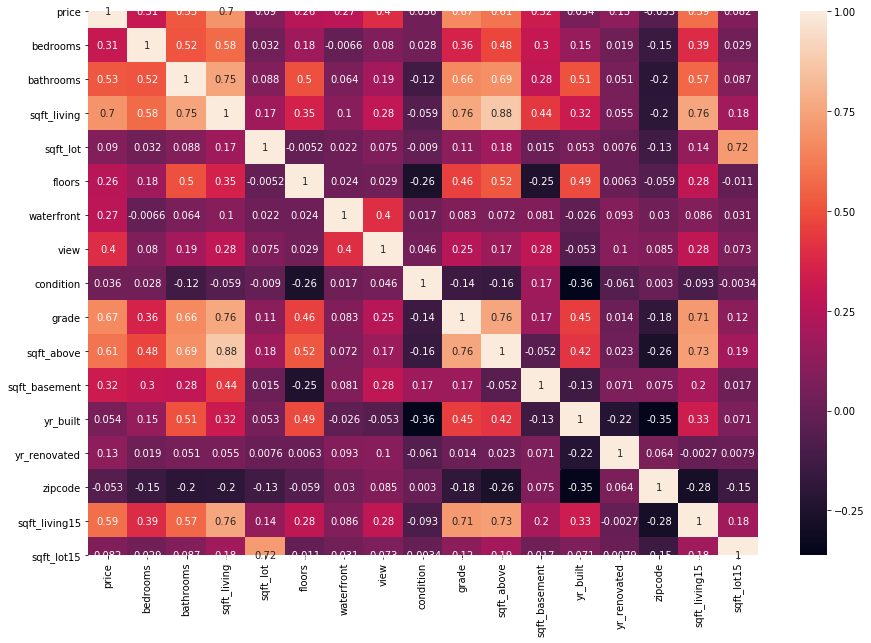

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(),annot=True)

In [52]:
correlation = dataset.corr(method='pearson')
columns = correlation.nlargest(6, 'price').index
columns

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms'],
      dtype='object')

In [53]:
data = dataset.copy().loc[:,['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms']]

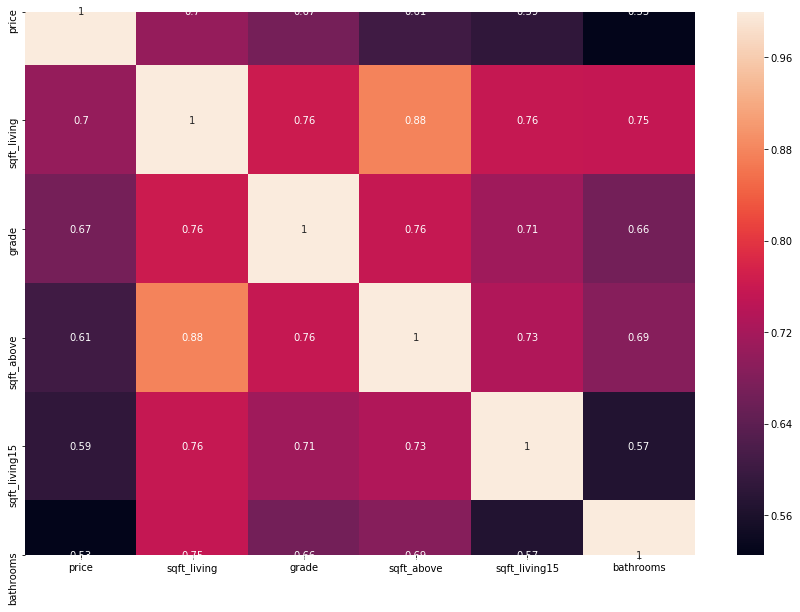

In [54]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

In [55]:
data.head()

price  sqft_living  grade  sqft_above  sqft_living15  bathrooms
0  221900.0         1180      7        1180           1340       1.00
1  538000.0         2570      7        2170           1690       2.25
2  180000.0          770      6         770           2720       1.00
3  604000.0         1960      7        1050           1360       3.00
4  510000.0         1680      8        1680           1800       2.00

In [56]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [57]:
X.head()

sqft_living  grade  sqft_above  sqft_living15  bathrooms
0         1180      7        1180           1340       1.00
1         2570      7        2170           1690       2.25
2          770      6         770           2720       1.00
3         1960      7        1050           1360       3.00
4         1680      8        1680           1800       2.00

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [59]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

17290
17290
4323
4323


# Criterion = Mse

In [60]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=20, criterion = 'mse'))

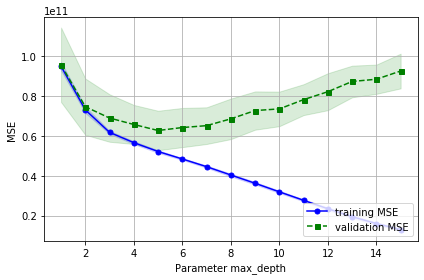

In [61]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = X_train,
                                                   y = y_train,
                                                   param_name = 'decisiontreeregressor__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   scoring= "neg_mean_squared_error",
                                                   cv=10)

train_mean = (np.mean(-train_scores, axis = 1))
train_std = np.std(-train_scores, axis = 1)
validation_mean = np.mean(-validation_scores, axis = 1)
validation_std = np.std(-validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training MSE')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation MSE')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('MSE')
# plt.ylim([-20.00, 100.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()

In [63]:
tr_regressor = DecisionTreeRegressor(random_state=20)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [64]:
tr_regressor.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [65]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [100,200, 300, 400, 500]
param_range3 = ['mse'] # 'explained_variance'도 가능

param_grid = {'max_depth': param_range1,
              'min_samples_leaf': param_range2,
              'criterion': param_range3}

grid_cv = GridSearchCV(tr_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ...criterion=mse, max_depth=1, min_samples_leaf=100; total time=   0.0s
[CV] END ...criterion=mse, max_depth=1, min_samples_leaf=100; total time=   0.0s
[CV] END ...criterion=mse, max_depth=1, min_samples_leaf=100; total time=   0.0s
[CV] END ...criterion=mse, max_depth=1, min_samples_leaf=100; total time=   0.0s
[CV] END ...criterion=mse, max_depth=1, min_samples_leaf=100; total time=   0.0s
[CV] END ...criterion=mse, max_depth=1, min_samples_leaf=200; total time=   0.0s
[CV] END ...criterion=mse, max_depth=1, min_samples_leaf=200; total time=   0.0s
[CV] END ...criterion=mse, max_depth=1, min_samples_leaf=200; total time=   0.0s
[CV] END ...criterion=mse, max_depth=1, min_samples_leaf=200; total time=   0.0s
[CV] END ...criterion=mse, max_depth=1, min_samples_leaf=200; total time=   0.0s
[CV] END ...criterion=mse, max_depth=1, min_samples_leaf=300; total time=   0.0s
[CV] END ...criterion=mse, max_depth=1, min_sam

[CV] END ...criterion=mse, max_depth=5, min_samples_leaf=100; total time=   0.0s
[CV] END ...criterion=mse, max_depth=5, min_samples_leaf=100; total time=   0.0s
[CV] END ...criterion=mse, max_depth=5, min_samples_leaf=200; total time=   0.0s
[CV] END ...criterion=mse, max_depth=5, min_samples_leaf=200; total time=   0.0s
[CV] END ...criterion=mse, max_depth=5, min_samples_leaf=200; total time=   0.0s
[CV] END ...criterion=mse, max_depth=5, min_samples_leaf=200; total time=   0.0s
[CV] END ...criterion=mse, max_depth=5, min_samples_leaf=200; total time=   0.0s
[CV] END ...criterion=mse, max_depth=5, min_samples_leaf=300; total time=   0.0s
[CV] END ...criterion=mse, max_depth=5, min_samples_leaf=300; total time=   0.0s
[CV] END ...criterion=mse, max_depth=5, min_samples_leaf=300; total time=   0.0s
[CV] END ...criterion=mse, max_depth=5, min_samples_leaf=300; total time=   0.0s
[CV] END ...criterion=mse, max_depth=5, min_samples_leaf=300; total time=   0.0s
[CV] END ...criterion=mse, m

[CV] END ...criterion=mse, max_depth=9, min_samples_leaf=200; total time=   0.0s
[CV] END ...criterion=mse, max_depth=9, min_samples_leaf=200; total time=   0.0s
[CV] END ...criterion=mse, max_depth=9, min_samples_leaf=200; total time=   0.0s
[CV] END ...criterion=mse, max_depth=9, min_samples_leaf=200; total time=   0.0s
[CV] END ...criterion=mse, max_depth=9, min_samples_leaf=300; total time=   0.0s
[CV] END ...criterion=mse, max_depth=9, min_samples_leaf=300; total time=   0.0s
[CV] END ...criterion=mse, max_depth=9, min_samples_leaf=300; total time=   0.0s
[CV] END ...criterion=mse, max_depth=9, min_samples_leaf=300; total time=   0.0s
[CV] END ...criterion=mse, max_depth=9, min_samples_leaf=300; total time=   0.0s
[CV] END ...criterion=mse, max_depth=9, min_samples_leaf=400; total time=   0.0s
[CV] END ...criterion=mse, max_depth=9, min_samples_leaf=400; total time=   0.0s
[CV] END ...criterion=mse, max_depth=9, min_samples_leaf=400; total time=   0.0s
[CV] END ...criterion=mse, m

In [66]:
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(-grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

GridSearchCV 최고 평균 정확도 수치: 60634301262.7028
GridSearchCV 최적 하이퍼파라미터:  {'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 100}


- Overfitting의 이유로 max = 5 채택

In [67]:
tr_regressor = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf = 100 ,random_state=20)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [68]:
y_pred = tr_regressor.predict(X_test)

In [69]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test,y_pred))

R squared: 0.562
MSE: 52071149399.867


In [76]:
tr_regressor = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf = 200 ,random_state=20)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [77]:
y_pred = tr_regressor.predict(X_test)

In [78]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test,y_pred))

R squared: 0.543
MSE: 54381820844.142


In [82]:
tr_regressor = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf = 300 ,random_state=20)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [83]:
y_pred = tr_regressor.predict(X_test)

In [84]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test,y_pred))

R squared: 0.530
MSE: 55847306839.897


In [85]:
tr_regressor = DecisionTreeRegressor(criterion='mse', max_depth=10, min_samples_leaf = 100 ,random_state=20)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [86]:
y_pred = tr_regressor.predict(X_test)

In [87]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test,y_pred))

R squared: 0.575
MSE: 50523789576.605


# Criterion = MAE

In [72]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=20, criterion = 'mae'))

### CRITERION이 mae 일때 너무 오래 돌아가 colab으로 돌려서 결과는 사진 첨부

In [ ]:
from sklearn.model_selection import validation_curve
import numpy as np

param_range = [1,2,3,4,5,6,7,8,9] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = X_train,
                                                   y = y_train,
                                                   param_name = 'decisiontreeregressor__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   scoring= "neg_mean_squared_error",
                                                   cv=10)

train_mean = (np.mean(-train_scores, axis = 1))
train_std = np.std(-train_scores, axis = 1)
validation_mean = np.mean(-validation_scores, axis = 1)
validation_std = np.std(-validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training MAE')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation MAE')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('MSE')
# plt.ylim([-20.00, 100.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()

In [73]:
from IPython.display import Image


![vali_mae](./vali_mae.png)

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [100,200, 300, 400, 500]
param_range3 = ['mae'] # 'explained_variance'도 가능

param_grid = {'max_depth': param_range1,
              'min_samples_leaf': param_range2,
              'criterion': param_range3}

grid_cv = GridSearchCV(tr_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터: ', grid_cv.best_params_)

![mae_gird](./mae_grid.png)

In [88]:
tr_regressor = DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf = 100 ,random_state=20)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [89]:
y_pred = tr_regressor.predict(X_test)

In [90]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test,y_pred))

R squared: 0.546
MSE: 54034645088.237


In [93]:
tr_regressor = DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf = 200 ,random_state=20)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [94]:
y_pred = tr_regressor.predict(X_test)

In [95]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test,y_pred))

R squared: 0.530
MSE: 55860559613.266


In [103]:
tr_regressor = DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf = 300 ,random_state=20)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [104]:
y_pred = tr_regressor.predict(X_test)

In [105]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test,y_pred))

R squared: 0.512
MSE: 58001871899.183


In [106]:
tr_regressor = DecisionTreeRegressor(criterion='mae', max_depth=8, min_samples_leaf = 100 ,random_state=20)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [107]:
y_pred = tr_regressor.predict(X_test)

In [108]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test,y_pred))

R squared: 0.562
MSE: 52143574006.157


# 최종 그림 : Criterion =MSE / Max_depth = 5 / min_samples_leaf = 100 결정 

In [109]:
import numpy as np
feature_names = data.columns.tolist()
feature_names.remove('price')
target_name = np.array(['price'])

In [110]:
best_tree_for_graph = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=100, random_state = 20)
best_tree_for_graph.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=100, random_state=20)

In [111]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image # CART Tree 그림
import pydotplus
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin'

dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data_best)
graph_best.write_png('tree_best_regression_r.png') #Tree 이미지를 저장

True

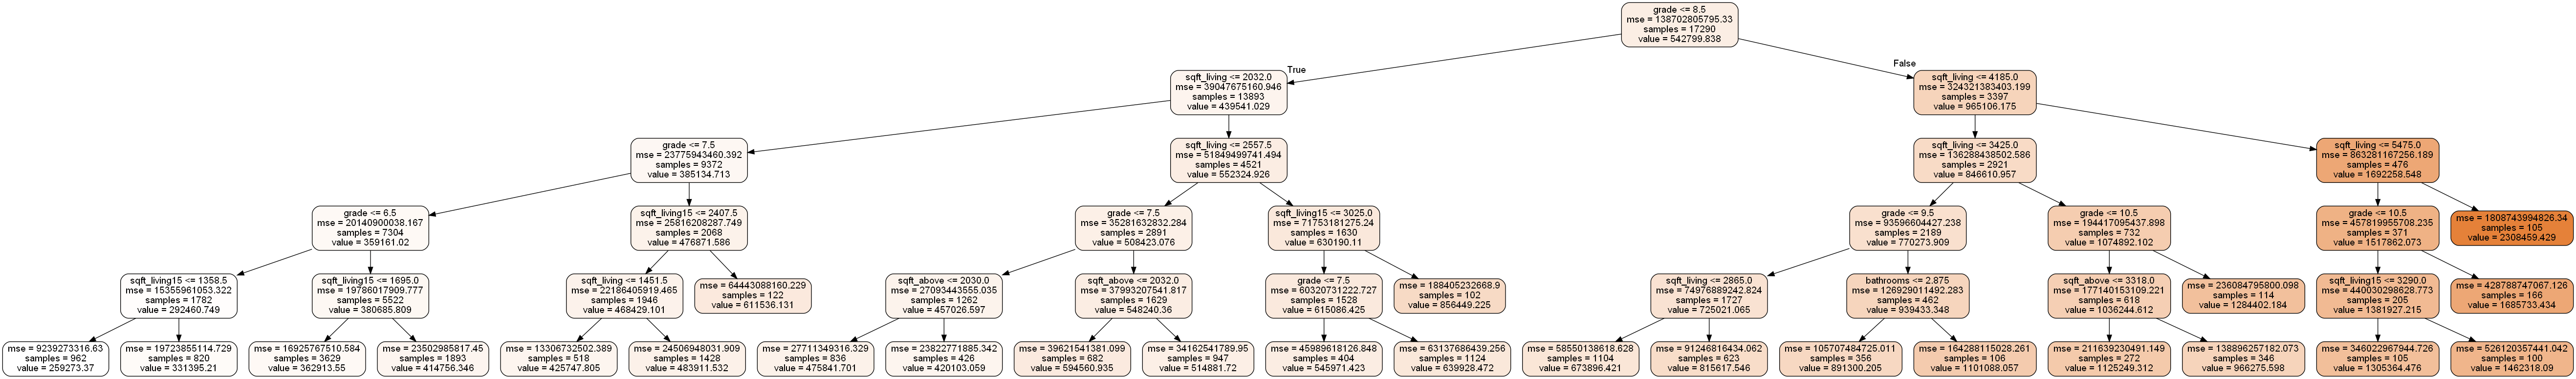

In [112]:
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)
Image(dt_graph_best.create_png())

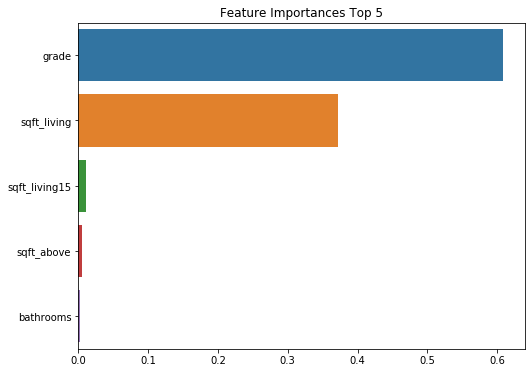

In [113]:
# Feature Importance

import seaborn as sns
feature_importance_values = best_tree_for_graph.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X.columns)
# 중요도값 순으로 Series를 정렬
feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [114]:
feature_importances.sort_values(ascending=False)

grade            0.609096
sqft_living      0.371988
sqft_living15    0.010929
sqft_above       0.005338
bathrooms        0.002649
dtype: float64